In [128]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import copy

In [2]:
insurance_df = pd.read_csv('insurance 2.csv')

In [4]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Outlier and missing values

In [5]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


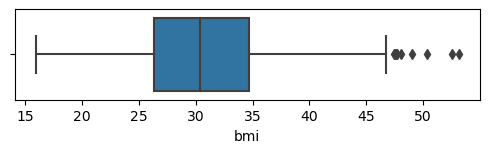

In [20]:
# Checking for the outliers
plt.figure(figsize= (6,4))
plt.subplot(3,1,1)
sns.boxplot(x= insurance_df['bmi'])
plt.show()

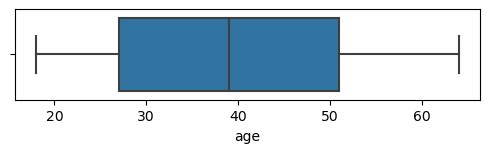

In [21]:
# Checking for the outliers
plt.figure(figsize= (6,4))
plt.subplot(3,1,1)
sns.boxplot(x= insurance_df['age'])
plt.show()

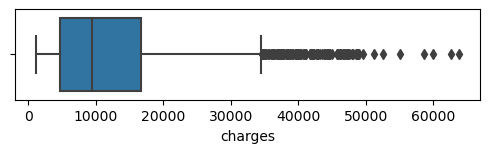

In [39]:
# Checking for the outliers
plt.figure(figsize= (6,4))
plt.subplot(3,1,1)
sns.boxplot(x= insurance_df['charges'])
plt.show()

### Outliers

Bmi : has a few extreme values.

Charges : is highly left skewed, there are quiet a lot of extreme values.

In [36]:
# statistics
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


####
1. Regarding the age column, the data appears to accurately reflect the typical age distribution among adults, with an average age of 39.

2. In the children column, it's evident that a minority of individuals have more than two children, as 75% of the population has two or fewer children.

3. The reported amount is significantly skewed, as the majority of individuals typically require basic medical care, with only a few facing more costly treatments for specific diseases.

### Visualization

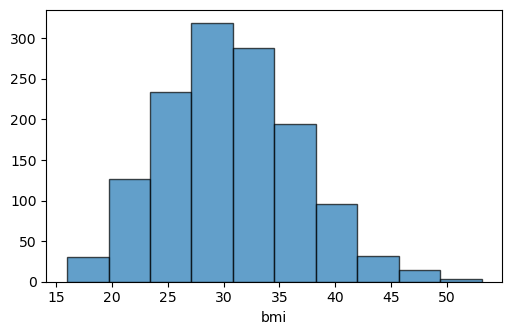

In [50]:
# Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,12))
plt.subplot(3,3,1)
plt.hist(insurance_df.bmi, edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')
plt.show()

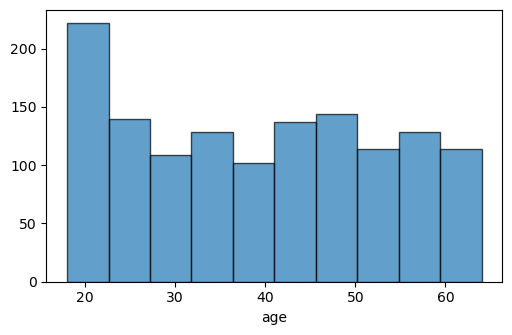

In [49]:
plt.figure(figsize= (20,12))
plt.subplot(3,3,1)
plt.hist(insurance_df['age'], edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')
plt.show()

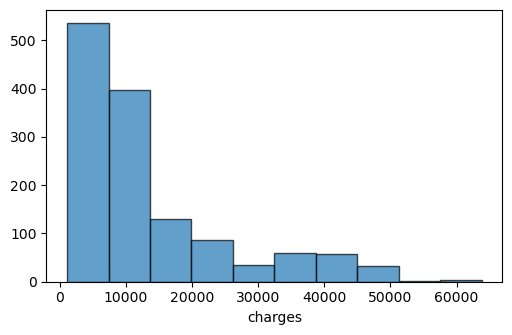

In [47]:
plt.figure(figsize= (20,12))
plt.subplot(3,3,1)
plt.hist(insurance_df['charges'], edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')
plt.show()

### Distribution of continous variables
1. BMI appears to follow a normal distribution.
2. Age demonstrates a uniform distribution pattern.
3. As observed in the preceding step, charges exhibit a significant skewness.

In [54]:
skewness = insurance_df[['bmi', 'age', 'charges']].skew()

In [55]:
skewness

bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

### Skewness

1. The BMI exhibits minimal skewness, as noted earlier.
2. Age demonstrates a uniform distribution, indicating no skewness.
3. Charges, however, display significant skewness.

In [68]:
insurance_df['smoker'].value_counts().values

array([1064,  274])

/var/folders/w7/wdzh3t395w70rr9jqvzpthn40000gn/T/ipykernel_16466/2175336477.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Non-smoker', 'Smoker'])


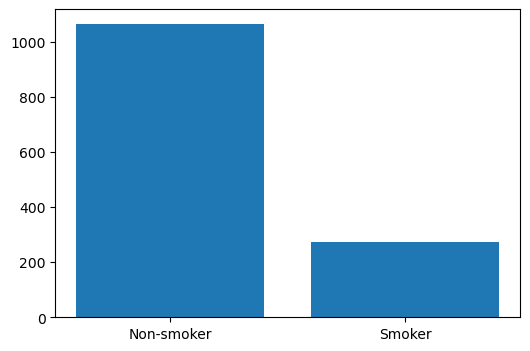

In [82]:
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(insurance_df['smoker'].value_counts().index, insurance_df['smoker'].value_counts().values)
ax.set_xticklabels(['Non-smoker', 'Smoker'])
plt.show()

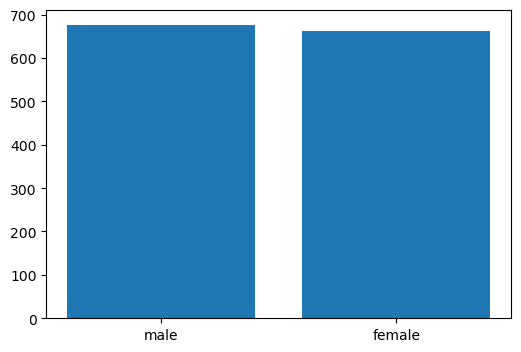

In [84]:
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(insurance_df['sex'].value_counts().index, insurance_df['sex'].value_counts().values)
plt.show()

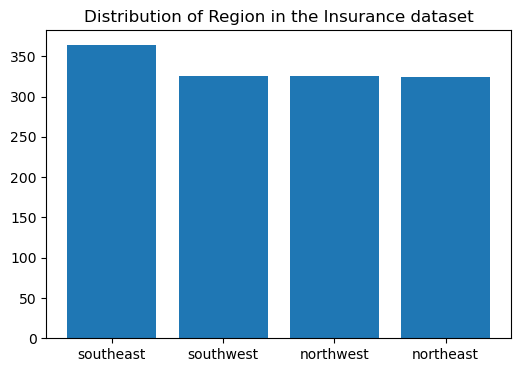

In [81]:
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(insurance_df['region'].value_counts().index, insurance_df['region'].value_counts().values)
ax.set_title('Distribution of Region in the Insurance dataset')
plt.show()

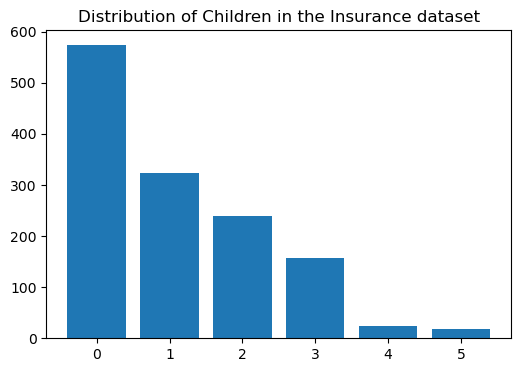

In [80]:
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(insurance_df['children'].value_counts().index, insurance_df['children'].value_counts().values)
ax.set_title('Distribution of Children in the Insurance dataset')
plt.show()

1. The number of non-smokers significantly outweighs that of smokers.
2. Instances are evenly spread across all regions.
3. Gender distribution is also uniform.
4. The majority of instances involve fewer than three children, with very few instances having four or five children.

/var/folders/w7/wdzh3t395w70rr9jqvzpthn40000gn/T/ipykernel_16466/598777003.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Smoker', 'Non Smoker'])


Text(0.5, 0, 'Charges')

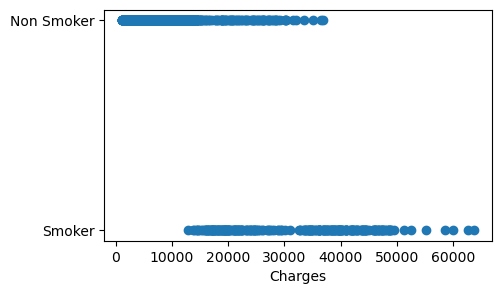

In [98]:
fig, ax = plt.subplots(figsize = (5,3))
ax.scatter(insurance_df['charges'], insurance_df['smoker'])
ax.set_yticklabels(['Smoker', 'Non Smoker'])
ax.set_xlabel('Charges')

<Figure size 400x300 with 0 Axes>

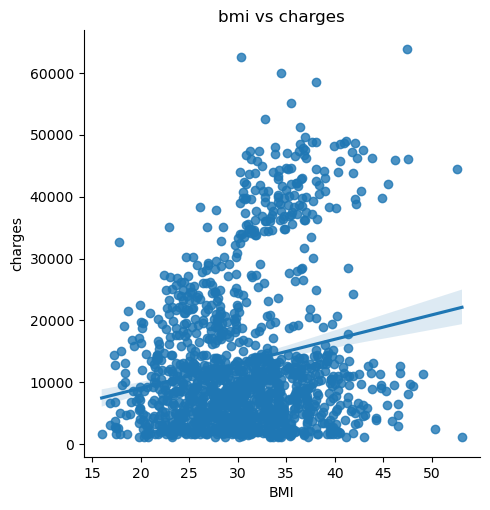

In [135]:
plt.figure(figsize=(4,3))
sns.lmplot(x = 'bmi',y='charges',data=insurance_df)
plt.xlabel('BMI')
plt.ylabel('charges')
plt.title('bmi vs charges')
plt.show()

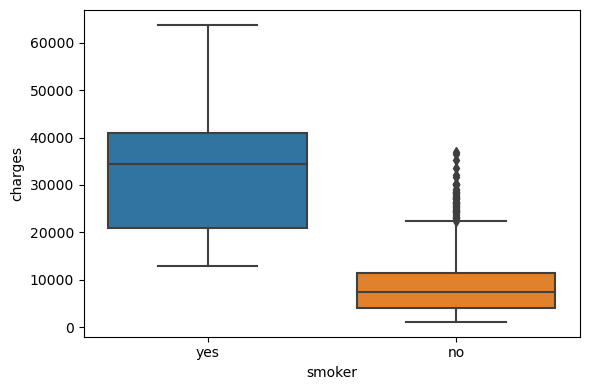

In [143]:
fig,ax = plt.subplots(figsize=(6,4))
sns.boxplot(x= 'smoker' ,y='charges',data=insurance_df,ax=ax)
plt.tight_layout()
plt.show()

<Axes: xlabel='children', ylabel='charges'>

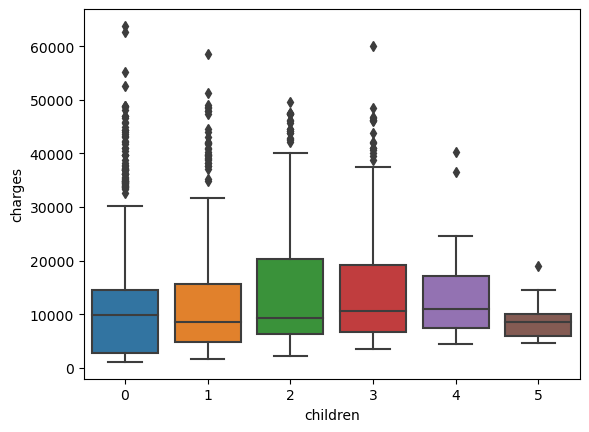

In [145]:
insurance_df['children'].unique()
sns.boxplot(x='children',y='charges',data=insurance_df)

## T-test

In [ ]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

In [117]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

# Selecting charges corresponding to smokers and non smoker as an array
x = insurance_df[insurance_df['smoker'] == 'yes']['charges'].values
y = insurance_df[insurance_df['smoker'] == 'no']['charges'].values

t, p_value = stats.ttest_ind(x, y, axis = 0)

if p_value < 0.05:
    print(f'{Ha} as ({p_value} < 0.05)')
else: 
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as (8.271435842179102e-283 < 0.05)


In [118]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = insurance_df[insurance_df['sex'] == 'male']['bmi'].values
y = insurance_df[insurance_df['sex'] == 'female']['bmi'].values

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


In [ ]:
#Is the proportion of smokers significantly different in different genders?

# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = ### Your Code Here  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

In [120]:
pd.crosstab(insurance_df['sex'], insurance_df['smoker'])

smoker,no,yes
sex,,
female,547,115
male,517,159


In [121]:
Ho = "Gender has no effect on smoking habits"   
Ha = "Gender has an effect on smoking habits"   

# Contingency table of sex and smoker attributes
crosstab = pd.crosstab(insurance_df['sex'], insurance_df['smoker'])

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)


# Setting our significance level at 5%
if p_value < 0.05:  
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')



Gender has an effect on smoking habits as the p_value (0.007) < 0.05


In [122]:
crosstab

smoker,no,yes
sex,,
female,547,115
male,517,159


In [123]:
# Chi_square test to check if smoking habits are different for people of different regions
Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['region'], insurance_df['smoker'])

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Region has no effect on smoking habits as the p_value (0.062) > 0.05


smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


In [127]:
# Is the distribution of bmi across women with no children, one child and two children, the same ?
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = insurance_df[insurance_df['sex'] == 'female']

zero_children_bmi = female_df[female_df['children'] == 0]['bmi']
one_child_bmi = female_df[female_df['children'] == 1]['bmi']
two_children_bmi = female_df[female_df['children'] == 2]['bmi']

f_stat, p_value = stats.f_oneway(zero_children_bmi,one_child_bmi,two_children_bmi)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05


### Results 
### Results

1. **Is the proportion of smokers significantly different in different genders?**
Based on the calculated p-value of 0.007, which is below the predetermined significance level of 0.05, it can be concluded that there exists a statistically significant relationship between gender and smoking habits. Specifically, the proportion of smokers among males differs significantly from that among females.

2. **Is the proportion of smokers significantly different in different genders?**
Region does not have significant effect on smoking habits as the p_value (0.062) > 0.05

3. **Is the distribution of bmi across women with no children, one child and two children, the same ?**
No. of children has no effect on bmi as the p_value (0.716) > 0.05

4. **Are charges different for smoker vs non smokers**
The observed discrepancy in charges between smokers and non-smokers is statistically significant, as evidenced by the calculated p-value (8.271435842179102e-283) being below the predefined significance threshold of 0.05. Notably, smokers have claimed higher expenses compared to non-smokers.

5. **As the BMI increases the charges increased**